In [ ]:
# Type of GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Jul 29 00:38:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Memory
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# Mount my Google Drive. 
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Copy over the preprocess.py and labels from Google Drive.
!cp drive/'My Drive'/Colab\ Notebooks/CS698/preprocess.py ./
!cp -r drive/'My Drive'/Colab\ Notebooks/CS698/label_data ./

In [ ]:
%load_ext autoreload
%autoreload 2

from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
import random
RS = 41
random.seed(RS)
np.random.seed(RS)

In [ ]:
INPUT_DATA_NAME = 'lang30_region'

if INPUT_DATA_NAME == 'lang30_region': 
  !cp drive/'My Drive'/Colab\ Notebooks/CS698/selected_utterances_10000.tgz ./
  # Unzip the utterance wav files. 
  !tar -xzf selected_utterances_10000.tgz
  print('number of utterances:')
  !ls ./selected_utterances_lang30_region/ | wc -w # 10000
  !rm selected_utterances_10000.tgz
else:
  # Copy over the utterance wav files and labels from Google Drive.
  !cp drive/'My Drive'/Colab\ Notebooks/CS698/selected_utterances.tgz ./
  !tar -xzf selected_utterances.tgz
  print('number of utterances:')
  !ls ./selected_utterances_lang70_region_v1.5/ | wc -w # 50000
  !rm selected_utterances.tgz

number of utterances:
10000


In [ ]:
# True: to calculate mfcc/log_mel from wav, False: to bring previously gotten mfcc/log_mel from Google Drive. 
SAVE_FEATURE = True

# mfcc/log_mel
FEATURE_TYPE = 'log_mel'

# If SAVE_FEATURE is False, then specify the feature set below. 
INPUT_SUBSET = 'feature_set_3_5'

if not SAVE_FEATURE:  
  # Set the folder name as needed! 
  !cp -r drive/'My Drive'/Colab\ Notebooks/CS698/feature_set_3_5 ./
  print('Copied over the feature_set.')
else: 
  !cp -r drive/'My Drive'/Colab\ Notebooks/CS698/feature_dir ./
  !cp -r drive/'My Drive'/Colab\ Notebooks/CS698/pickles_dir ./
  print('Created empty feature_dir and pickles_dir.')

Created empty feature_dir and pickles_dir.


In [ ]:
if INPUT_DATA_NAME == 'lang30_region': 
  WAV_PATH = "./selected_utterances_" + INPUT_DATA_NAME
else: 
  WAV_PATH = "./selected_utterances_" + INPUT_DATA_NAME + "_v1.5"

LABELS_TABLE_PATH = "label_data/" + INPUT_DATA_NAME + ".csv"

# FEATURE_PATH
if not SAVE_FEATURE: 
  FEATURE_PATH = INPUT_SUBSET + "/" + FEATURE_TYPE + ".npy"
else:
  FEATURE_PATH = "feature_dir/" + FEATURE_TYPE + ".npy"
print('FEATURE_PATH:', FEATURE_PATH)

# Set 20/128!
FEATURE_HEIGHT = 128
MAX_LEN_TIME = 75
CHANNEL = 1

FEATURE_PATH: feature_dir/log_mel.npy


In [ ]:
# Save features and get labels. 
import pickle

if SAVE_FEATURE: 
  # Create features and labels. 
  labels, label_map = save_features_and_get_labels(WAV_PATH, LABELS_TABLE_PATH, FEATURE_TYPE, 
                                                 SAVE_FEATURE, FEATURE_PATH,  
                                                 FEATURE_HEIGHT, MAX_LEN_TIME)
  with open('pickles_dir/labels.pickle', 'wb') as f:
    pickle.dump(labels , f)
  with open('pickles_dir/label_map.pickle', 'wb') as f:
    pickle.dump(label_map , f)
  # Save to Google Drive. 
  !cp -r feature_dir drive/My\ Drive/Colab\ Notebooks/CS698/feature_created/
  !cp -r pickles_dir drive/'My Drive'/Colab\ Notebooks/CS698/pickles_created/
else: 
  # Set the pickles dir name!  
  !cp -r drive/'My Drive'/Colab\ Notebooks/CS698/feature_set_test_pickles ./ 
  with open(INPUT_SUBSET + '_pickles/labels.pickle', 'rb') as f:
    labels = pickle.load(f)
  with open(INPUT_SUBSET + '_pickles/label_map.pickle', 'rb') as f:
    label_map = pickle.load(f)

feature_height: 128
max_len_time: 75
Generating labels ...
Generating log_mel ...
wav to log_mel, 500 done.
wav to log_mel, 1000 done.
wav to log_mel, 1500 done.
wav to log_mel, 2000 done.
wav to log_mel, 2500 done.
wav to log_mel, 3000 done.
wav to log_mel, 3500 done.
wav to log_mel, 4000 done.
wav to log_mel, 4500 done.
wav to log_mel, 5000 done.
wav to log_mel, 5500 done.
wav to log_mel, 6000 done.
wav to log_mel, 6500 done.
wav to log_mel, 7000 done.
wav to log_mel, 7500 done.
wav to log_mel, 8000 done.
wav to log_mel, 8500 done.
wav to log_mel, 9000 done.
wav to log_mel, 9500 done.
wav to log_mel, 10000 done.


In [ ]:
NUM_CLASSES = len(label_map)
print(NUM_CLASSES)

124


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = get_train_test(FEATURE_PATH, labels, 0.1, RS)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9000, 128, 75) (1000, 128, 75) (9000, 1) (1000, 1)


In [ ]:
# Check distribution. 
y_train_df = pd.DataFrame(y_train)
y_train_df.shape

(9000, 1)

In [ ]:
# Check the distribution of labels, and create label_list and label_names. 
s = y_train_df.loc[:, 0].value_counts()
label_list = list(s.index)
label_names = [label_map[v] for v in label_list]
print(type(s))
print('# classes:', len(s))
print(s)
# print(label_map)
print(label_list)
print(label_names)

<class 'pandas.core.series.Series'>
# classes: 29
69     922
76     893
54     835
66     822
73     638
53     581
17     475
39     437
49     400
95     258
19     255
120    243
97     239
37     194
50     179
20     173
40     169
56     156
29     145
109    136
96     125
116    121
101    108
91     100
115     99
58      95
38      91
86      68
8       43
Name: 0, dtype: int64
['Arabic' 'Bengali' 'Cantonese' 'Chinese' 'Creole' 'Eng_AK' 'Eng_AL'
 'Eng_AR' 'Eng_AZ' 'Eng_Afghanistan' 'Eng_Algeria' 'Eng_American Samoa'
 'Eng_Angola' 'Eng_Australia' 'Eng_Barbados' 'Eng_Belize' 'Eng_Brazil'
 'Eng_CA' 'Eng_CO' 'Eng_CT' 'Eng_Canada' 'Eng_Cape Verde' 'Eng_Costa Rica'
 'Eng_DC' 'Eng_DE' 'Eng_Dominica' 'Eng_Ecuador' 'Eng_FL' 'Eng_France'
 'Eng_GA' 'Eng_Georgia' 'Eng_Germany' 'Eng_Ghana' 'Eng_Guam' 'Eng_Guyana'
 'Eng_HI' 'Eng_Haiti' 'Eng_IA' 'Eng_ID' 'Eng_IL' 'Eng_IN' 'Eng_India'
 'Eng_Indonesia' 'Eng_Ireland' 'Eng_Israel' 'Eng_Ivory Coast'
 'Eng_Jamaica' 'Eng_Japan' 'Eng_Jordan' 'Eng_K

In [ ]:
# Reshape to perform 2D convolution. 
X_train = X_train.reshape(X_train.shape[0], FEATURE_HEIGHT, MAX_LEN_TIME, CHANNEL)
X_test = X_test.reshape(X_test.shape[0], FEATURE_HEIGHT, MAX_LEN_TIME, CHANNEL)

# If loss is set to sparse_categorical_crossentropy, we don't need this. 
# y_train_cat = to_categorical(y_train, num_classes=NUM_CLASSES)
# print(y_dev[:3])
# y_test_cat = to_categorical(y_test, num_classes=NUM_CLASSES)
# print(y_dev[:3])

In [ ]:
tf.random.set_seed(RS)

In [ ]:
EPOCHS = 200
BATCH_SIZE = 64
LEARNING_RATE = 0.0005

In [ ]:
!mkdir model_5
# !cp -r drive/'My Drive'/Colab\ Notebooks/CS698/models ./
# Set model file name. 
model_path = 'models/model_2_4_log_mel_5.h5'

mkdir: cannot create directory ‘model_5’: File exists


In [ ]:
def get_model(filter_size):
    model = Sequential()

    # # Arch_1
    # model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(FEATURE_HEIGHT, MAX_LEN_TIME, CHANNEL)))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Flatten())
    # model.add(Dense(256, activation='relu'))
    # model.add(Dense(NUM_CLASSES, activation='softmax'))

    # # Arch_0_1
    # model.add(Conv2D(32, kernel_size=(filter_size, filter_size), padding='same', activation='relu', input_shape=(FEATURE_HEIGHT, MAX_LEN_TIME, CHANNEL)))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(48, kernel_size=(filter_size, filter_size), padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(120, kernel_size=(filter_size, filter_size), padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Flatten())
    # model.add(Dense(128, activation='relu'))
    # model.add(Dense(64, activation='relu'))
    # model.add(Dense(32, activation='relu'))
    # model.add(Dense(NUM_CLASSES, activation='softmax'))

    # # Arch_0_4
    # model.add(Conv2D(32, kernel_size=(filter_size, filter_size), padding='same', activation='relu', input_shape=(FEATURE_HEIGHT, MAX_LEN_TIME, CHANNEL)))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(48, kernel_size=(filter_size, filter_size), padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(120, kernel_size=(filter_size, filter_size), padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Flatten())
    # model.add(Dense(128, activation='relu'))
    # model.add(Dense(NUM_CLASSES, activation='softmax'))

    # # Arch_2_2
    # model.add(Conv2D(16, kernel_size=(filter_size, filter_size), padding='same', activation='relu', input_shape=(FEATURE_HEIGHT, MAX_LEN_TIME, CHANNEL)))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(32, kernel_size=(filter_size, filter_size), padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(64, kernel_size=(filter_size, filter_size), padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(128, kernel_size=(filter_size, filter_size), padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Flatten())
    # model.add(Dense(128, activation='relu'))
    # model.add(Dense(64, activation='relu'))
    # model.add(Dense(32, activation='relu'))
    # model.add(Dense(NUM_CLASSES, activation='softmax'))

    # # Arch_2_3
    # model.add(Conv2D(16, kernel_size=(filter_size, filter_size), padding='same', activation='relu', input_shape=(FEATURE_HEIGHT, MAX_LEN_TIME, CHANNEL)))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(32, kernel_size=(filter_size, filter_size), padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(64, kernel_size=(filter_size, filter_size), padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Conv2D(128, kernel_size=(filter_size, filter_size), padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Flatten())
    # model.add(Dense(128, activation='relu'))
    # model.add(Dense(NUM_CLASSES, activation='softmax'))

    # Arch_2_4
    model.add(Conv2D(16, kernel_size=(filter_size, filter_size), padding='same', activation='relu', input_shape=(FEATURE_HEIGHT, MAX_LEN_TIME, CHANNEL)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(filter_size, filter_size), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(filter_size, filter_size), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(filter_size, filter_size), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(NUM_CLASSES, activation='softmax'))


    opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [ ]:
# Load Tensorboard extension 
%load_ext tensorboard

import os, re, math, json, shutil, pprint
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import IPython.display as display
from matplotlib import pyplot as plt
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Tensorflow version 2.2.0


In [ ]:
#@title visualization utilities [RUN ME]
"""
This cell contains helper functions used for visualization
and downloads only. You can skip reading it. There is very
little useful Keras/Tensorflow code here.
"""

# Matplotlib config
plt.ioff()
plt.rc('image', cmap='gray_r')
plt.rc('grid', linewidth=1)
plt.rc('xtick', top=False, bottom=False, labelsize='large')
plt.rc('ytick', left=False, right=False, labelsize='large')
plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
plt.rc('text', color='a8151a')
plt.rc('figure', facecolor='F0F0F0', figsize=(16,9))
# Matplotlib fonts
MATPLOTLIB_FONT_DIR = os.path.join(os.path.dirname(plt.__file__), "mpl-data/fonts/ttf")

# pull a batch from the datasets. This code is not very nice, it gets much better in eager mode (TODO)
def dataset_to_numpy_util(training_dataset, validation_dataset, N):
  
  # get one batch from each: 10000 validation digits, N training digits
  batch_train_ds = training_dataset.apply(tf.data.experimental.unbatch()).batch(N)
  
  # eager execution: loop through datasets normally
  if tf.executing_eagerly():
    for validation_digits, validation_labels in validation_dataset:
      validation_digits = validation_digits.numpy()
      validation_labels = validation_labels.numpy()
      break
    for training_digits, training_labels in batch_train_ds:
      training_digits = training_digits.numpy()
      training_labels = training_labels.numpy()
      break
    
  else:
    v_images, v_labels = validation_dataset.make_one_shot_iterator().get_next()
    t_images, t_labels = batch_train_ds.make_one_shot_iterator().get_next()
    # Run once, get one batch. Session.run returns numpy results
    with tf.Session() as ses:
      (validation_digits, validation_labels,
       training_digits, training_labels) = ses.run([v_images, v_labels, t_images, t_labels])
  
  # these were one-hot encoded in the dataset
  validation_labels = np.argmax(validation_labels, axis=1)
  training_labels = np.argmax(training_labels, axis=1)
  
  return (training_digits, training_labels,
          validation_digits, validation_labels)

# create digits from local fonts for testing
def create_digits_from_local_fonts(n):
  font_labels = []
  img = PIL.Image.new('LA', (28*n, 28), color = (0,255)) # format 'LA': black in channel 0, alpha in channel 1
  font1 = PIL.ImageFont.truetype(os.path.join(MATPLOTLIB_FONT_DIR, 'DejaVuSansMono-Oblique.ttf'), 25)
  font2 = PIL.ImageFont.truetype(os.path.join(MATPLOTLIB_FONT_DIR, 'STIXGeneral.ttf'), 25)
  d = PIL.ImageDraw.Draw(img)
  for i in range(n):
    font_labels.append(i%10)
    d.text((7+i*28,0 if i<10 else -4), str(i%10), fill=(255,255), font=font1 if i<10 else font2)
  font_digits = np.array(img.getdata(), np.float32)[:,0] / 255.0 # black in channel 0, alpha in channel 1 (discarded)
  font_digits = np.reshape(np.stack(np.split(np.reshape(font_digits, [28, 28*n]), n, axis=1), axis=0), [n, 28*28])
  return font_digits, font_labels

# utility to display a row of digits with their predictions
def display_digits(digits, predictions, labels, title, n):
  fig = plt.figure(figsize=(13,3))
  digits = np.reshape(digits, [n, 28, 28])
  digits = np.swapaxes(digits, 0, 1)
  digits = np.reshape(digits, [28, 28*n])
  plt.yticks([])
  plt.xticks([28*x+14 for x in range(n)], predictions)
  plt.grid(b=None)
  for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
    if predictions[i] != labels[i]: t.set_color('red') # bad predictions in red
  plt.imshow(digits)
  plt.grid(None)
  plt.title(title)
  display.display(fig)
  
# utility to display multiple rows of digits, sorted by unrecognized/recognized status
def display_top_unrecognized(digits, predictions, labels, n, lines):
  idx = np.argsort(predictions==labels) # sort order: unrecognized first
  for i in range(lines):
    display_digits(digits[idx][i*n:(i+1)*n], predictions[idx][i*n:(i+1)*n], labels[idx][i*n:(i+1)*n],
                   "{} sample validation digits out of {} with bad predictions in red and sorted first".format(n*lines, len(digits)) if i==0 else "", n)

def plot_learning_rate(lr_func, epochs):
  xx = np.arange(epochs+1, dtype=np.float)
  y = [lr_decay(x) for x in xx]
  fig, ax = plt.subplots(figsize=(9, 6))
  ax.set_xlabel('epochs')
  ax.set_title('Learning rate\ndecays from {:0.3g} to {:0.3g}'.format(y[0], y[-2]))
  ax.minorticks_on()
  ax.grid(True, which='major', axis='both', linestyle='-', linewidth=1)
  ax.grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5)
  ax.step(xx,y, linewidth=3, where='post')
  display.display(fig)

class PlotTraining(tf.keras.callbacks.Callback):
  def __init__(self, sample_rate=1, zoom=1):
    self.sample_rate = sample_rate
    self.step = 0
    self.zoom = zoom
    self.steps_per_epoch = 60000//BATCH_SIZE

  def on_train_begin(self, logs={}):
    self.batch_history = {}
    self.batch_step = []
    self.epoch_history = {}
    self.epoch_step = []
    self.fig, self.axes = plt.subplots(1, 2, figsize=(16, 7))
    plt.ioff()

  def on_batch_end(self, batch, logs={}):
    if (batch % self.sample_rate) == 0:
      self.batch_step.append(self.step)
      for k,v in logs.items():
        # do not log "batch" and "size" metrics that do not change
        # do not log training accuracy "acc"
        if k=='batch' or k=='size':# or k=='acc':
          continue
        self.batch_history.setdefault(k, []).append(v)
    self.step += 1

  def on_epoch_end(self, epoch, logs={}):
    plt.close(self.fig)
    self.axes[0].cla()
    self.axes[1].cla()
      
    self.axes[0].set_ylim(0, 1.2/self.zoom)
    self.axes[1].set_ylim(1-1/self.zoom/2, 1+0.1/self.zoom/2)
    
    self.epoch_step.append(self.step)
    for k,v in logs.items():
      # only log validation metrics
      if not k.startswith('val_'):
        continue
      self.epoch_history.setdefault(k, []).append(v)

    display.clear_output(wait=True)
    
    for k,v in self.batch_history.items():
      self.axes[0 if k.endswith('loss') else 1].plot(np.array(self.batch_step) / self.steps_per_epoch, v, label=k)
      
    for k,v in self.epoch_history.items():
      self.axes[0 if k.endswith('loss') else 1].plot(np.array(self.epoch_step) / self.steps_per_epoch, v, label=k, linewidth=3)
      
    self.axes[0].legend()
    self.axes[1].legend()
    self.axes[0].set_xlabel('epochs')
    self.axes[1].set_xlabel('epochs')
    self.axes[0].minorticks_on()
    self.axes[0].grid(True, which='major', axis='both', linestyle='-', linewidth=1)
    self.axes[0].grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5)
    self.axes[1].minorticks_on()
    self.axes[1].grid(True, which='major', axis='both', linestyle='-', linewidth=1)
    self.axes[1].grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5)
    display.display(self.fig)

In [ ]:
# Set filter size. 
filter_size = 5

model = get_model(filter_size)

# Print model layers
model.summary()

# Utility callback that displays training curves
# plot_training = PlotTraining(sample_rate=10, zoom=1)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 128, 75, 16)       416       
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 64, 37, 16)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 64, 37, 32)        12832     
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 32, 18, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 32, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 16, 9, 64)         0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 16, 9, 128)      

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
            EarlyStopping(patience=50),
            ModelCheckpoint(model_path, save_best_only=True)
        ]

In [ ]:
# steps_per_epoch = 1000//BATCH_SIZE  # 1,000 items in this dataset
# print("Steps per epoch: ", steps_per_epoch)
# model.fit(X_train, y_train, steps_per_epoch=steps_per_epoch, validation_steps=1, epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val), callbacks=[plot_training])

# history = model.fit(X_train, y_train_cat, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=0.1, shuffle=True, callbacks=callbacks)
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=0.1, shuffle=True, callbacks=callbacks)

Train on 8100 samples, validate on 900 samples
Epoch 1/200
8100/8100 [==============================] - 2s 283us/step - loss: 4.0858 - accuracy: 0.0577 - val_loss: 3.2586 - val_accuracy: 0.1033
Epoch 2/200
8100/8100 [==============================] - 2s 244us/step - loss: 2.9147 - accuracy: 0.1699 - val_loss: 2.6528 - val_accuracy: 0.2033
Epoch 3/200
8100/8100 [==============================] - 2s 247us/step - loss: 2.4121 - accuracy: 0.2711 - val_loss: 2.1706 - val_accuracy: 0.3522
Epoch 4/200
8100/8100 [==============================] - 2s 246us/step - loss: 1.8884 - accuracy: 0.4225 - val_loss: 1.6939 - val_accuracy: 0.4867
Epoch 5/200
8100/8100 [==============================] - 2s 245us/step - loss: 1.4132 - accuracy: 0.5632 - val_loss: 1.3237 - val_accuracy: 0.6011
Epoch 6/200
8100/8100 [==============================] - 2s 246us/step - loss: 1.0559 - accuracy: 0.6736 - val_loss: 1.0816 - val_accuracy: 0.6756
Epoch 7/200
8100/8100 [==============================] - 2s 245us/step 

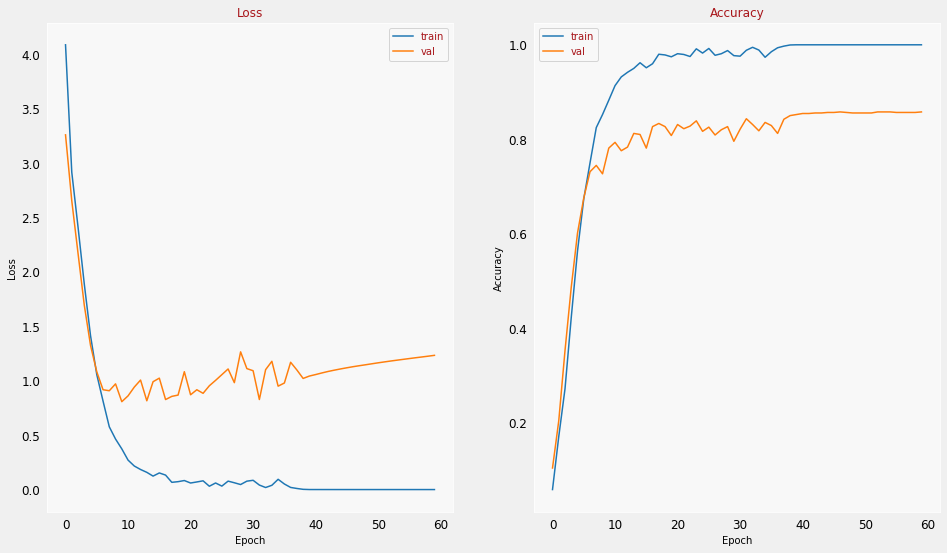

In [ ]:
# Plot loss during training. 
plt.subplot(121)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
# Plot accuracy during training. 
plt.subplot(122)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [ ]:
# Get Model Predictions for test data. 
from sklearn.metrics import classification_report

predicted_classes = model.predict_classes(X_test)
# print(predicted_classes)
# print(y_test)
d = classification_report(y_test, predicted_classes, labels=label_list, target_names=label_names, digits=4, output_dict=True)
print('accuracy:', d['accuracy'])

accuracy: 0.84


In [ ]:
!cp -r drive/'My Drive'/Colab\ Notebooks/CS698/confusion_matrices ./
# Set cm file name. 
cm_path = 'confusion_matrices/cm_25.csv'
cm_df = pd.DataFrame(d).T
cm_df.head()

,precision,recall,f1-score,support
Eng_NY,0.820755,0.887755,0.852941,98.0
Eng_PA,0.815126,0.815126,0.815126,119.0
Eng_MD,0.792453,0.848485,0.819512,99.0
Eng_NJ,0.913043,0.848485,0.879581,99.0
Eng_OH,0.824561,0.839286,0.831858,56.0


In [ ]:
cm_df.to_csv(cm_path, header=True, index=True)

In [ ]:
# !cp -r models drive/'My Drive'/Colab\ Notebooks/CS698/
!cp -r model_5 drive/'My Drive'/Colab\ Notebooks/CS698/
!cp -r confusion_matrices drive/'My Drive'/Colab\ Notebooks/CS698/

print('Copied model and confusion matrix to Google Drive.')

Copied model and confusion matrix to Google Drive.
